In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
import re


files = ['nlp_out_' + str(i * 1000) + '.txt' for i in range(0, 347)]
# def form_dict(jap_tocs):
#     freq = defaultdict(int)
#     for tok in jap_tocs:
#         freq[tok] += 1
#     return freq

def parse_line(line):
    split_line = line.split('|')
    line_id = int(split_line[0])
    year = int(split_line[1])
    jap = split_line[2]
    
    split_jap = jap.split(',')

    resulting_string = ''
    for elem in split_jap:
        m = re.search('[a-zA-Z]', elem)
        if (m is not None) or (elem == ''):
            continue
        resulting_string += (elem + ' ')

    # print(resulting_string)
    return line_id, year, resulting_string

ids = []
years = []
docs = []

for file in files:
    in_file = open(file, 'r')
    for line in in_file:
        line_id, year, tokens = parse_line(line)
        ids.append(line_id)
        years.append(year)
        docs.append(tokens)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(docs)
Y = years


# X
# import matplotlib.pyplot as plt
# plt.figure(figsize = (20,20))
# plt.spy(X, markersize= 1)
# plt.savefig('plot.png')

# X



In [2]:
features = vectorizer.get_feature_names_out()

In [3]:
from scipy.sparse import csr_array, find
import numpy as np

row, col, val = find(X)
unique, counts = np.unique(col, return_counts=True)

counts = dict(zip(unique, counts))
# counts
counts_sorted = {features[k]: v for k, v in sorted(counts.items(), key=lambda item: item[1], reverse=True)}
counts_sorted

{'ない': 123340,
 'いる': 113710,
 'こと': 107959,
 'もう': 97835,
 'なる': 75107,
 'ある': 72567,
 'なっ': 68480,
 'まま': 67325,
 '世界': 64691,
 'いい': 62894,
 'きっと': 60492,
 '明日': 58319,
 '忘れ': 57231,
 '言葉': 56730,
 '今日': 56626,
 'もの': 56025,
 'また': 54100,
 '自分': 52916,
 'ずっと': 52546,
 '未来': 51965,
 'どう': 51806,
 'そう': 51503,
 'くれ': 50859,
 'よう': 47643,
 'まだ': 46212,
 '出し': 45702,
 '生き': 45487,
 'ゆく': 44688,
 '思い': 42972,
 '好き': 42789,
 '笑顔': 42579,
 '信じ': 41300,
 'かけ': 40664,
 '想い': 39675,
 '抱き': 39506,
 'いく': 39179,
 '少し': 39075,
 '消え': 38866,
 '二人': 38482,
 '気持ち': 38365,
 '知ら': 38023,
 '出す': 37835,
 '見え': 37314,
 '日々': 37015,
 'ただ': 36285,
 '時間': 35594,
 '愛し': 34586,
 '行く': 34316,
 '笑っ': 34254,
 'もっと': 34221,
 '場所': 33350,
 'なく': 33300,
 'しめ': 32588,
 '幸せ': 31210,
 'する': 31023,
 '泣い': 30570,
 'たち': 30168,
 'すぐ': 30098,
 '感じ': 29914,
 '同じ': 29716,
 '遠く': 29386,
 '待っ': 28894,
 '全て': 28749,
 'みんな': 28567,
 'あっ': 27964,
 '本当': 27391,
 '振り': 27062,
 '探し': 27037,
 '一人': 26689,
 'そっと': 25860,
 'ひとり': 251

In [4]:

def year_2_decade(year):
    if year < 2000:
        return 1
    elif year >= 2000 and year < 2010:
        return 2
    elif year >= 2010 and year < 2020:
        return 3
    else:
        return 4

Y = [year_2_decade(year) for year in years]

unique_classes, counts_over_decades = np.unique(Y, return_counts=True)
print(unique_classes)
print(counts_over_decades)

Y = csr_array(Y).T

[1 2 3 4]
[ 37239  88779 155060  66111]


In [5]:
from scipy.sparse import hstack

# Z = hstack([X, Y])
print(X.shape)
print(Y.shape)

Z = hstack([X, Y], format = 'csr')
Z
# import pandas as pd

# Z = pd.DataFrame(X.toarray())
# Z.head

classes_col = Z.shape[1] - 1

(347189, 236989)
(347189, 1)


In [6]:
from sklearn.model_selection import train_test_split

Z_train, Z_test = train_test_split(Z, test_size=0.1, shuffle=True, random_state=0, stratify=Z.getcol(classes_col).toarray())   
# разделим в на обучение/тест в заданной пропорции

In [7]:
def XY_split(Z, Y_col):
    '''Функция разбиения по признаки и отклики'''
    Y = Z.getcol(Y_col)
    X = Z[:, 0:Y_col - 1]
    # X = X.drop('Y',axis=1)
    return X, Y

X_train, Y_train = XY_split(Z_train, classes_col)
X_test, Y_test = XY_split(Z_test, classes_col)

In [8]:
from sklearn import neighbors
from sklearn import metrics
from sklearn.neighbors import NearestCentroid



# model = NearestCentroid()
# model.fit(X_train,Y_train)
# Y_hat = model.predict(X_test)



In [10]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
model.fit(X_train, np.ravel(Y_train.toarray()))
Y_hat = model.predict(X_test)

# show_accuracy(Y_test, Y_hat)

model.get_params()  # возвращает текущие параметры модели

/home/kudiko/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': -1,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [11]:
Y_hat

array([3., 3., 3., ..., 3., 3., 3.])

Accuracy: 0.44


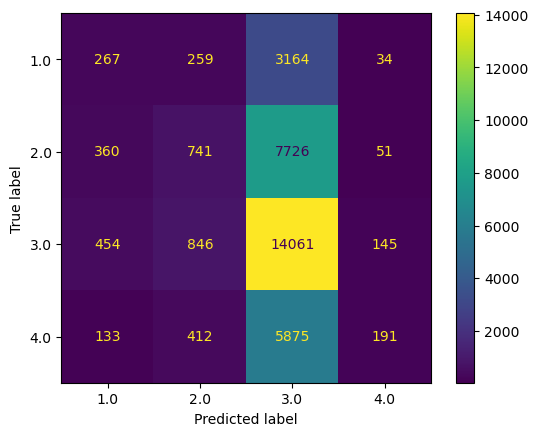

In [12]:
def show_accuracy(Y_test, Y_hat):
    acc = metrics.accuracy_score(Y_test.toarray(), Y_hat)
    print(f'Accuracy: {acc:.2f}')
    
    cm = metrics.confusion_matrix(Y_test.toarray(), Y_hat)   # матрица счётчиков true_class x predicted_class
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()

show_accuracy(Y_test, Y_hat)

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline(
    [
    # ('norm', StandardScaler()),
    ('model', KNeighborsClassifier(n_neighbors=11))
    ])

search_space = {'model__n_neighbors':[3,5,7,9], 'model__p':np.linspace(1, 5, 5)}
np.random.seed(0)
grid_search = GridSearchCV(pipe, search_space, scoring='accuracy', refit=True, n_jobs=2)    # n_jobs=-1: использовать все процессоры, а не один (по умолчанию)


In [11]:

grid_search.fit(X_train, np.ravel(Y_train.toarray()))
grid_search.best_params_   # параметры наилучшего метода

/home/kudiko/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/kudiko/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

In [ ]:

Y_hat = grid_search.predict(X_test)    # можно предсказывать и объектом grid_search, если он был вызван с refit=True (по умолчанию)

show_accuracy(Y_test, Y_hat)